In [134]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [136]:
from wordcloud import WordCloud, STOPWORDS 

In [137]:
import re

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [141]:
from sklearn.naive_bayes import MultinomialNB

In [142]:
df=pd.read_csv('emails.csv')

In [143]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [144]:
df.shape

(5728, 2)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Checking for null values 

In [146]:
df.isnull().sum()

text    0
spam    0
dtype: int64

## EDA and Data Cleaning

In [147]:
df.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

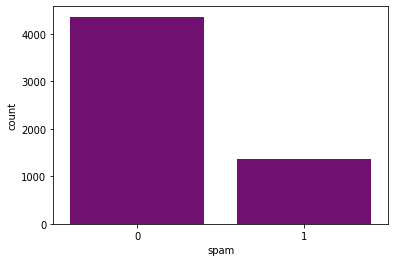

In [148]:
sns.countplot(x='spam',data=df,color='purple')

In [149]:
def change_text(a):
    x=a.split(':')
    return x[1]

In [150]:
df['text']=df['text'].apply(change_text)

In [151]:
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [152]:
wordnet=WordNetLemmatizer()
stemmer=PorterStemmer()

In [153]:
def clean_text(a):
    text=re.sub('[^a-zA-Z0-9]', ' ', a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text = [wordnet.lemmatize(word) for word in text if not word in (stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [154]:
df['text']=df['text'].apply(clean_text)

In [155]:
df.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,4 color printing special request additional in...,1
4,money get software cd software compatibility g...,1


### Most occuring word in spam email

In [156]:
word=''
for i in df.index:
    if(df['spam'][i]==1):
        words=nltk.word_tokenize(df['text'][i])
        for j in words:
            j.upper()
            word=word+' '+j
               

In [157]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = 'none', 
                min_font_size = 10).generate(word) 

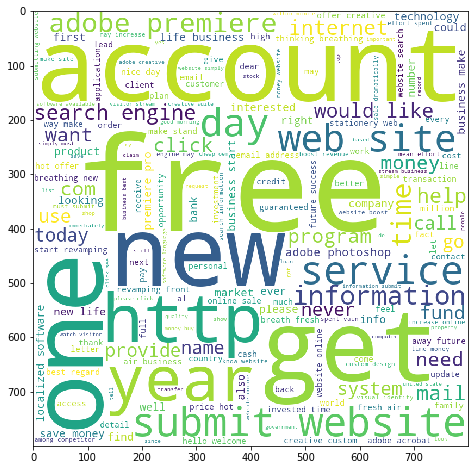

In [158]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

### Most occuring words in non spam email

In [159]:
word=''
for i in df.index:
    if(df['spam'][i]==0):
        words=nltk.word_tokenize(df['text'][i])
        for j in words:
            j.upper()
            word=word+' '+j
               

In [160]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = 'none', 
                min_font_size = 10).generate(word)

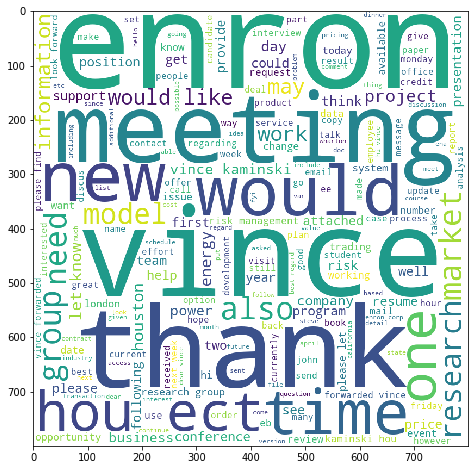

In [161]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

In [162]:
vectorizer=TfidfVectorizer()

In [163]:
cvectorizer=CountVectorizer()

In [164]:
x=df['text']
x

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new home made easy im wanting sho...
3       4 color printing special request additional in...
4       money get software cd software compatibility g...
                              ...                        
5723                                                     
5724                                                     
5725                                                     
5726                                                     
5727                                                 news
Name: text, Length: 5728, dtype: object

In [165]:
X=vectorizer.fit_transform(x).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
x1=cvectorizer.fit_transform(x).toarray()
x1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [167]:
y=df['spam']
y

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

### Applying ML Algorithms

In [168]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

#### Tfidf Vectorizer

In [169]:
print(cross_val_score(MultinomialNB(),X,y,cv=cv,scoring='accuracy'))

[0.89586969 0.9220477  0.91448517 0.91913903 0.9098313  0.93019197
 0.9080861  0.91215823 0.9098313  0.9080861 ]


In [170]:
print(cross_val_score(MultinomialNB(),X,y,cv=cv,scoring='accuracy').mean())

0.9129726585223967


#### Count Vectorizer 

In [171]:
print(cross_val_score(MultinomialNB(),x1,y,cv=cv,scoring='accuracy'))

[0.96393252 0.96974985 0.96858639 0.97731239 0.96509599 0.96916812
 0.96625945 0.96800465 0.96684119 0.96625945]


In [172]:
print(cross_val_score(MultinomialNB(),x1,y,cv=cv,scoring='accuracy').mean())

0.9681210005817334


#### Count Vectorizer gives more accuracy so using its model

### Building model and confusion matrix

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [174]:
nb=MultinomialNB()

In [175]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [176]:
prediction=nb.predict(x_test)

In [177]:
nb.score(x_train,y_train)

0.9812920927912198

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [179]:
confusion_matrix(prediction,y_test)

array([[1271,   55],
       [   7,  386]])

In [180]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1326
           1       0.88      0.98      0.93       393

    accuracy                           0.96      1719
   macro avg       0.93      0.97      0.95      1719
weighted avg       0.97      0.96      0.96      1719



### Model is 96%  with max acc=97%